<a href="https://colab.research.google.com/github/Jhaempyre/kubernetes_colab/blob/main/kubernetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Kubernetes think will be covered A to Z

Now we have containers that run on docker engine but we want to montor them and do things like healing and self constructible nad destructible , more alsoloadbalancers and etc thst's where kubernetes comes in picture

All data inside are sotred in etcd about pod info and all

controller manager ceks if all the services and pods is running , sceduler  scedules all things

kubelet is in the worker node , and works as manager to them ...
then there are service /kube proxy we can work to talk to all of them
these ndoes conncets to each other on CNI network ..


kubectl is the controller that gives instruction works as kube controllers

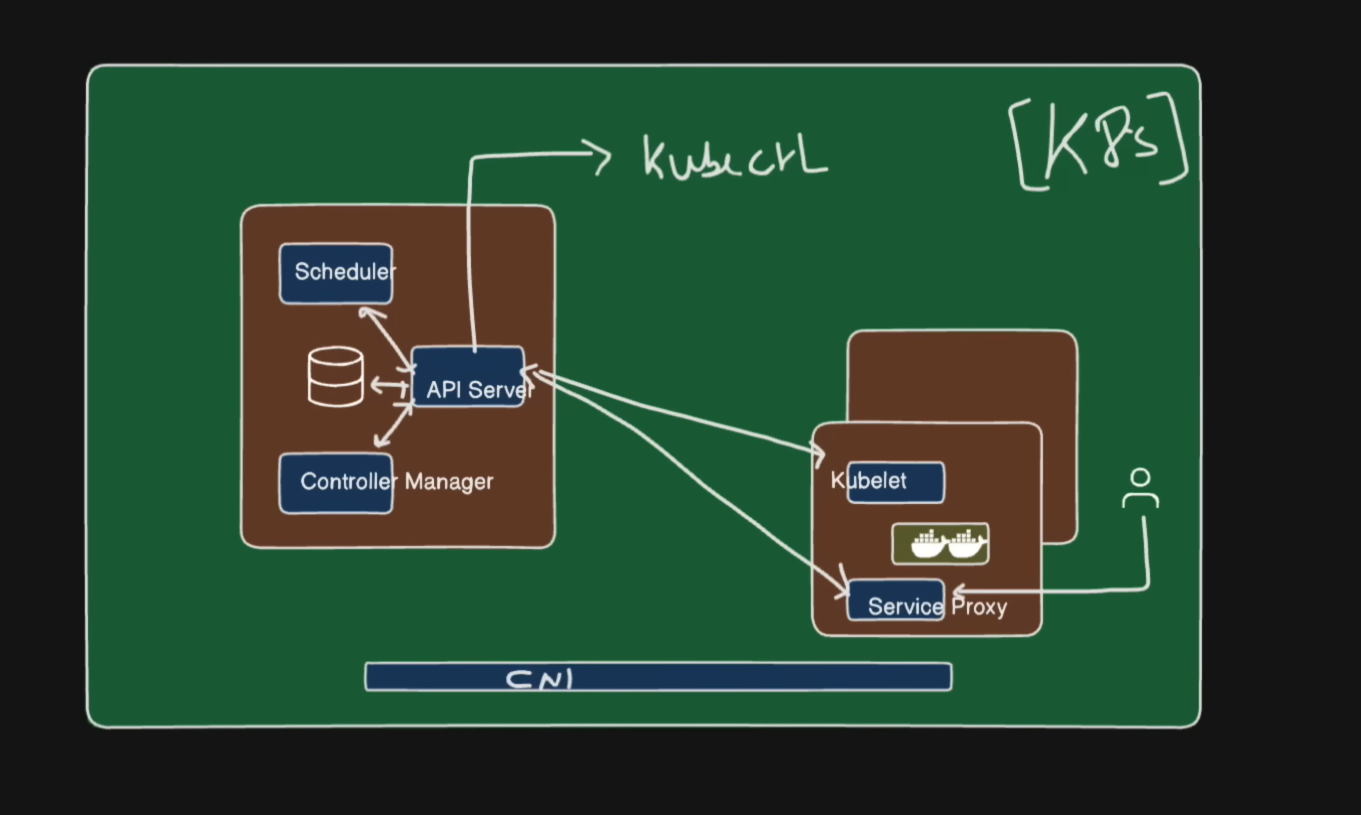

Installing kubeadm in master and slave(wroker) node

https://github.com/LondheShubham153/kubernetes-in-one-shot

1) creating machines both for worker and master node


In [ ]:
run these commands on master and worker nodes both

In [ ]:
#!/bin/bash

# Execute on Both "Master" & "Worker" Nodes:

# 1. Disable Swap: Required for Kubernetes to function correctly.
echo "Disabling swap..."
sudo swapoff -a
sleep 2

# 2. Load Necessary Kernel Modules: Required for Kubernetes networking.
echo "Loading necessary kernel modules for Kubernetes networking..."
cat <<EOF | sudo tee /etc/modules-load.d/k8s.conf
overlay
br_netfilter
EOF

sudo modprobe overlay
sudo modprobe br_netfilter
sleep 2

# 3. Set Sysctl Parameters: Helps with networking.
echo "Setting sysctl parameters for networking..."
cat <<EOF | sudo tee /etc/sysctl.d/k8s.conf
net.bridge.bridge-nf-call-iptables  = 1
net.bridge.bridge-nf-call-ip6tables = 1
net.ipv4.ip_forward                 = 1
EOF

sudo sysctl --system
lsmod | grep br_netfilter
lsmod | grep overlay
sleep 2

# 4. Install Containerd:
echo "Installing containerd..."
sudo apt-get update
sleep 2

sudo apt-get install -y ca-certificates curl
sleep 2

sudo install -m 0755 -d /etc/apt/keyrings
sudo curl -fsSL https://download.docker.com/linux/ubuntu/gpg -o /etc/apt/keyrings/docker.asc
sudo chmod a+r /etc/apt/keyrings/docker.asc
sleep 2

echo "deb [arch=$(dpkg --print-architecture) signed-by=/etc/apt/keyrings/docker.asc] https://download.docker.com/linux/ubuntu $(. /etc/os-release && echo \"$VERSION_CODENAME\") stable" | sudo tee /etc/apt/sources.list.d/docker.list > /dev/null

sudo apt-get update
sleep 2

sudo apt-get install -y containerd.io
sleep 2

containerd config default | sed -e 's/SystemdCgroup = false/SystemdCgroup = true/' -e 's/sandbox_image = "registry.k8s.io\/pause:3.6"/sandbox_image = "registry.k8s.io\/pause:3.9"/' | sudo tee /etc/containerd/config.toml

sudo systemctl restart containerd
sleep 2

sudo systemctl is-active containerd
sleep 2

# 5. Install Kubernetes Components:
echo "Installing Kubernetes components (kubelet, kubeadm, kubectl)..."
sudo apt-get update
sleep 2

sudo apt-get install -y apt-transport-https ca-certificates curl gpg
sleep 2

curl -fsSL https://pkgs.k8s.io/core:/stable:/v1.29/deb/Release.key | sudo gpg --dearmor -o /etc/apt/keyrings/kubernetes-apt-keyring.gpg
sleep 2

echo 'deb [signed-by=/etc/apt/keyrings/kubernetes-apt-keyring.gpg] https://pkgs.k8s.io/core:/stable:/v1.29/deb/ /' | sudo tee /etc/apt/sources.list.d/kubernetes.list

sudo apt-get update
sleep 2

sudo apt-get install -y kubelet kubeadm kubectl
sleep 2

sudo apt-mark hold kubelet kubeadm kubectl
sleep 2

echo "Kubernetes setup completed."

In [ ]:
on master only

In [ ]:
sudo kubeadm init

In [ ]:
mkdir -p $HOME/.kube
  sudo cp -i /etc/kubernetes/admin.conf $HOME/.kube/config
  sudo chown $(id -u):$(id -g) $HOME/.kube/config

In [ ]:
//calico for connection

In [ ]:
kubectl apply -f https://raw.githubusercontent.com/projectcalico/calico/v3.26.0/manifests/calico.yaml

In [ ]:
to join  the servers


In [ ]:
 kubeadm token create --print-join-command

this will genrate a commnad that should be pasted on the slave after these commnad

In [ ]:
only on wotker node

In [ ]:
//to remove misunderstanidng of master and slave

In [ ]:
sudo kubeadm reset pre-flight checks

In [ ]:
sudo {output of  kubeadm token create --print-join-command}

In [ ]:
watch on the server using watch kubeadm get nodes

There is a namespace that holds all the resources like deployment service pods inside it so that system has an idea what resource being used indepencdently within each namespace
(group)

Namespace


kubectl get namesapce
kubectl get ns (for getting namesapce )

In [ ]:
kubectl get pods -n kube-system

// to get the internal pods running inside the kube-system

In [ ]:
 kubectl create ns nginx

 // to create the namesapce

In [ ]:
// to run the pod

kubectl run nginx --image=nginx

by default it gets created in defualt namespcae if not specified earlier

In [ ]:
//to do it in a particular namespcae
 kubectl run nginx --image=nginx -n nginx
 //to get pods from the nginx namespace
  kubectl get pods -n nginx

to delte in a paricular namespace

In [ ]:
 kubectl delete pod nginx -n nginx

but commnad could be memory sensitive to human thus progressing through yaml file

In [ ]:
//To get inside a running pod as we do in docker by docker exec same
here as

 kubectl exec -it pod/nginx-bhavyaa -n nginx -- bash

In [ ]:
//to describe the pods complete information
 kubectl describe pod/nginx-bhavyaa -n nginx

To makethis pods scalable we need to have thing like deploymnet ,Let's learn deploymnet